<a href="https://colab.research.google.com/github/Windamaharani24/Pemrograman_Python/blob/main/TugasPythin_Week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Winda Maharani Sihotang

NIM   : 1101194351

Kelas : TT-43-G1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [12]:
frek=1800 #MHz
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [13]:
LpUrban=cos(frek, 'urban', tower, user, d)
LpSuburban=cos(frek, 'suburban', tower, user, d)
LpOpen=cos(frek, 'open', tower, user, d)

In [14]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

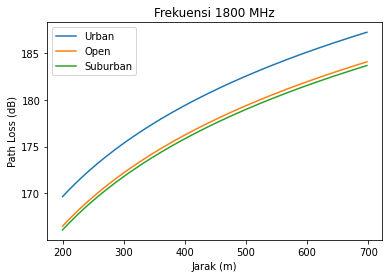

In [15]:
plt.figure()
plt.plot(d_sort,Urban_sort, label='Urban')
plt.plot(d_sort,Open_sort, label='Open')
plt.plot(d_sort,Suburban_sort, label='Suburban')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [16]:
frek1= 700 #mhz
frek2= 900 #mhz
frek3= 1800 #mhz
loc= 'urban'
LpUrban1=cos(frek1, loc, tower, user, d)
LpUrban2=cos(frek2, loc, tower, user, d)
LpUrban3=cos(frek3, loc, tower, user, d)

In [17]:
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

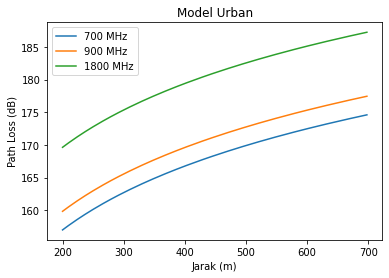

In [18]:
plt.figure()
plt.plot(d_sort,Urban1_sort, label='700 MHz')
plt.plot(d_sort,Urban2_sort, label='900 MHz')
plt.plot(d_sort,Urban3_sort, label='1800 MHz')
plt.title('Model Urban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()